<a href="https://colab.research.google.com/github/aditya-15-stack/task-7/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Summary:
  product  total_qty  revenue
0   Apple         15      7.5
1  Banana         30      6.0
2  Orange         15      4.5


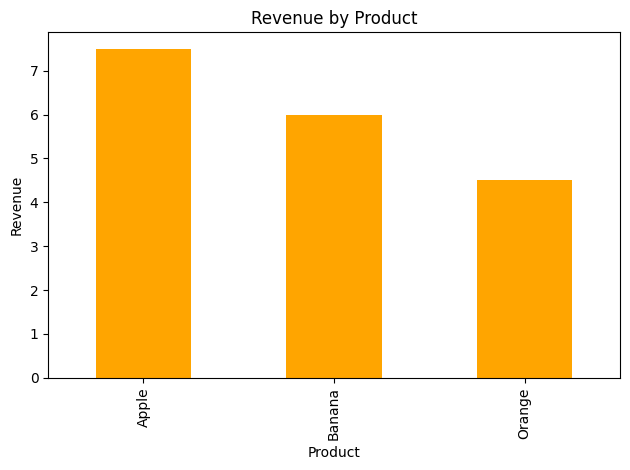

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to an SQLite database (it creates a file in Colab's memory space)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Clear old data
cursor.execute("DELETE FROM sales")

# Insert sample data
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 20, 0.2),
    ('Orange', 15, 0.3),
    ('Apple', 5, 0.5),
    ('Banana', 10, 0.2),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Query data
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Print results
print("Sales Summary:")
print(df)

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# Close connection
conn.close()
